# Derivatives

Relative to integrals, derivatives are rather easy to calculate.  

## Forward difference

The standard definition of the derivative (with respect to $x$) is
\begin{equation}
    f^{\prime}(x) = \lim\limits_{h\to0}\frac{f(x+h)-f(x)}{h}
\end{equation}.  When evaluating this expression numerically on a grid of $x$ values, we can't take the limit $h\to0$, but we can make it as small as possible.  In this case, we would calculate the derivative as 
\begin{equation}\tag{1}
    f^{\prime}(x) \approx \frac{f(x+h)-f(x)}{h}
\end{equation}.  This expression is known as the "forward difference."  

Equivalently, we can also calculate the "backward difference:
\begin{equation}
    f^{\prime}(x) \approx \frac{f(x)-f(x-h)}{h}
\end{equation}.  In general, both the forward and backward diffrence give similar results.  However, there are exceptions (e.g. a discontinuity in the derivative).

As an example, let's calculate the derivative of $f(x)=\sin(x)$ at $x=\pi$ using the forward difference, and compare to the true derivative.  First, let's prepare to calculate the derivative.

In [1]:
import numpy as np
import math

n = 101   #number of points in the grid of x values
x0 = 0
xn = 2*math.pi

xValues = np.linspace(x0, xn, n)
yValues = np.sin(xValues)
h = (xn - x0) / (n-1)   #denominator is the number of slices: n grid points -> n-1 slices

Now let's find the index of the sample point corresponding to $x=\pi$.  We can do so using the numpy functions `isclose()` and `where()`.

The `islcose()` function returns an `array` of booleans which tells us if the corresponding elements from our input `array` are close to a particular value.

In [2]:
np.isclose(xValues, math.pi)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

We can then pass this `array` to the `where()` function, which returns an `array` of indices corresponding to `True` (nested inside a `tuple`).

In [3]:
np.where(np.isclose(xValues, math.pi))

(array([50]),)

From this, we can extraxt the desir

In [4]:
i = np.where(np.isclose(xValues, math.pi))[0][0]

Finally, we can calculate the derivative using Equation 1 (for all sample points) and compare to the true value.

In [5]:
forwardDiff = (yValues[i+1] - yValues[i]) / h
actual = math.cos(xValues[i])

forwardDiff, actual

(-0.9993421562398355, -1.0)

Even with just 101 points in our grid of $x$ values, the forward difference gives a pretty good approximation to the true derivative.

## Error

No matter what method we choose to numerically calculate the integral, there will be approximation error resulting from the fact that we didn't take the limit $h\to0$.  Similar to the case of integration, we can investigate the error using a Taylor series.  Expanding $f(x+h)$ about $x$ gives
\begin{equation}
    f(x+h) = f(x) + hf^{\prime}(x) + \frac{1}{2}h^2f^{\prime\prime}(x) + \cdots
\end{equation}.  This can be rearranged to solve for $f^{\prime}(x)$:
\begin{equation}\tag{2}
    f^{\prime}(x) = \frac{f(x+h)-f(x)}{h} -\frac{1}{2}hf^{\prime\prime}(x) + \cdots
\end{equation}.

Comparing Equations 1 and 2, we see that the leading error in the forward difference is proportional to $h$ (the same is also true for backwards difference):  
\begin{equation}
    \epsilon \approx \frac{h}{2}f^{\prime\prime}(x)
\end{equation}.  Therefore, to minimize the approximation error, we should make $h$ as small as possible.

However, the numerator of Equation 1 involves the subtraction of $f(x)$ from $f(h+h)$, which become very close to one another for small $h$.  As we learned, subtraction of similar floats leads to large rounding error.  Therefore, we must find a compromise to minimize the total error.

To explore this phenomenon, let's calculate the same derivative as above, varying the number of points in the grid (and therefore the grid spacing $h$).  However, to reduce the CPU required, we will only calculate the derivative at $x=\pi$.

Text(0, 0.5, '|Error|')

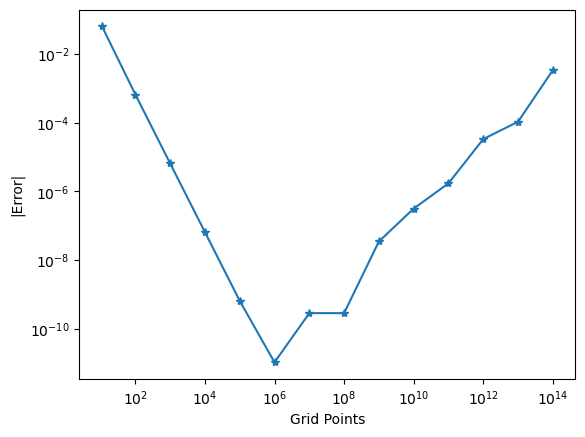

In [6]:
import matplotlib.pyplot as plt

error = []
gridSize = [10**exponent+1 for exponent in range(1,15)]

x = math.pi

#loop over various grid sizes
for n in gridSize:
    h = (xn - x0) / (n-1)
    
    xValues = np.array([x, x+h],float)   #only considering the two points we really need to calculate the forward difference at x
    yValues = np.sin(xValues)
    
    forwardDiff = (yValues[1] - yValues[0]) / h
    actual = math.cos(x)

    error.append(abs(actual - forwardDiff))
    
plt.figure()
plt.plot(gridSize, error, "*-")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grid Points')
plt.ylabel('|Error|')

The error is minimized when using $10^6$ grid points, for which the approximation error and rounding error are approximately equal.  Reducing the number of grid points (increasing $h$) leads to larger approximation error, which then dominates the total error.  Alternatively, increasing the number of grid points (decreasing $h$) leads to larger rounding error, which then dominates.

#### Exercise: 

Plot the derivative of $f(x)=\sin(x)$ from $x=0$ to $x=2\pi$, using the forward difference method, without using a `for` loop.  Compare your result with $\cos(x)$.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
n = 20   #number of points in the grid of x values

xValues = np.linspace(0, 2*math.pi, n)
yValues = np.sin(xValues)
h = (xValues[-1] - xValues[0])/(n-1)

#yValues[1:]  = [y1, y2, y3, ...]
#yValues[:-1] = [y0, y1, y2, ...]
#taking the element-by-element difference of these arrays gives the numerator of the forward difference formula
forwardDiff = (yValues[1:] - yValues[:-1]) / h

cosine = np.cos(xValues)   #calculate the true derivative

plt.figure()
plt.plot(xValues[:-1], forwardDiff,       label="Forward Difference")
plt.plot(xValues[:-1], cosine[:-1], "g--", label="cos(x)")   #ignore final value of cosine so the size of both arrays are equal
plt.legend()
```
    
</details>

## Central difference

We can improve the derivative calculation by using the central difference:
\begin{equation}
    f^{\prime}(x) \approx \frac{f(x+\frac{h}{2}) - f(x-\frac{h}{2})}{h}
\end{equation}.  
Note that the grid points are now separated by $\Delta x = h/2$.  This means $h = 2\Delta x$.

Following a similar procedure as above, it can be shown that the leading error when using the central difference is now only proportional to $h^2$:
\begin{equation}
    \epsilon \approx \frac{h^2}{24}f^{\prime\prime\prime}(x)
\end{equation}.

Let's compare the derivative of $f(x)=\sin(x)$ using the forward and central difference equations.

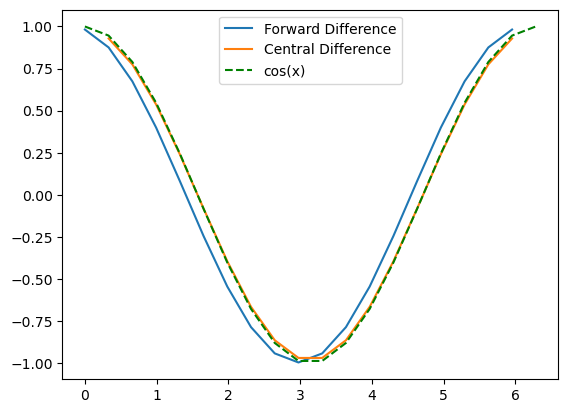

In [7]:
n = 20   #number of points in the grid of x values

xValues = np.linspace(0, 2*math.pi, n)
yValues = np.sin(xValues)

#First calculate the forward difference
h = (xn - x0) / (n-1)
#yValues[1:]  = [y1, y2, y3, ...]
#yValues[:-1] = [y0, y1, y2, ...]
#taking the element-by-element difference of these arrays gives the numerator of the forward difference formula
forwardDiff = (yValues[1:] - yValues[:-1]) / h

#Now calculate the central difference
h = 2 * (xn - x0) / (n-1)   #Note the factor 2 here (to account for the fact the grid spacing is now only h/2)

#yValues[2:]  = [y2, y3, y4, ...]
#yValues[:-2] = [y0, y1, y2, ...]
#taking the element-by-element difference of these arrays gives the numerator of the central difference formula
centralDiff = (yValues[2:] - yValues[:-2]) / h
cosine = np.cos(xValues)   #calculate the true derivative

plt.figure()
plt.plot(xValues[:-1],  forwardDiff,  label="Forward Difference")  #slice away final x value, since we can't calculate the forward diffrence for this point
plt.plot(xValues[1:-1], centralDiff,   label="Central Difference") #slice away first and last x values, since we cant calculate the forward difference for these points
plt.plot(xValues,       cosine,      "g--",  label="cos(x)")
plt.legend()

## Higher-order approximations

All three of the methods discussed so far are effectively linear approximations.  Each method considers two grid points, "fits" a first-order polynomial to the points, and calculates $f^{\prime}(x)$ as the slope of the line (at $x$).  

When discussing integrals, we saw that we could improve the precision of our approximation by instead using a higher-order polynomial.  The same is true for derivatives.  Considering three points in our grid, we can "fit" a second-order polynomial to the points and calculate $f^{\prime}(x)$ as the slope of the polynomial at $x$.

### Noisy data

Additional challenges arise when attempting to take the derivative of noisy data points.  To demonstrate, we will generate some data corresponding to $f(x) = \sin(x)$ and artifically add some noise.

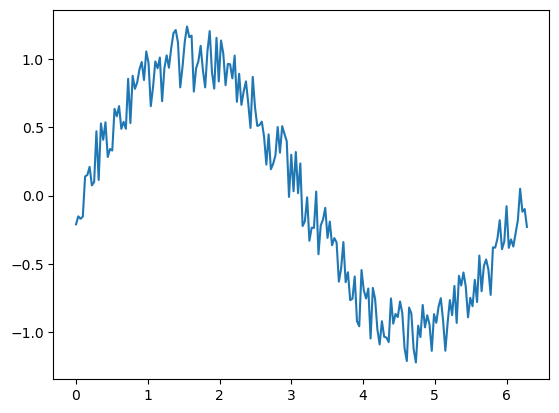

In [8]:
n = 200

xValues = np.linspace(0, 2*math.pi, n)
yValues = np.sin(xValues) + np.random.uniform(-.25, .25, n)

plt.figure()
plt.plot(xValues, yValues)

Let's calculate the derivative using the central difference method, and compare to the known derivative $f^{\prime}(x) = \cos(x)$.

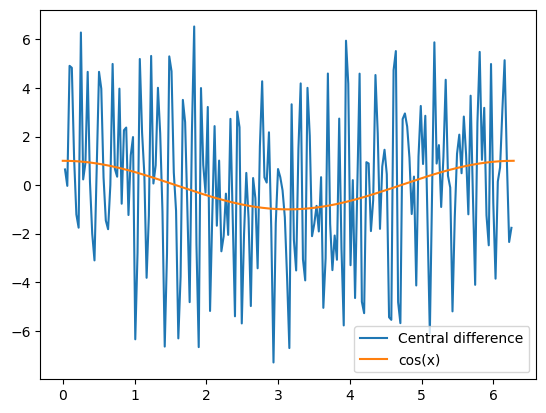

In [9]:
cosine = np.cos(xValues)

h = 2 * (xn - x0) / (n-1)   #Note the factor 2 here (to account for the fact the grid spacing is now only h/2)

#yValues[2:]  = [y2, y3, y4, ...]
#yValues[:-2] = [y0, y1, y2, ...]
#taking the element-by-element difference of these arrays gives the numerator of the forward difference formula
centralDiff = (yValues[2:] - yValues[:-2]) / h

plt.figure()
plt.plot(xValues[1:-1], centralDiff, label="Central difference")   #slice away first and last x values, since we cant calculate the forward difference for these points
plt.plot(xValues, cosine, label="cos(x)")
plt.legend()

The numerical derivative is completely dominated by the noise, without any resemblence to the true derivative.

There are a few approaches typically taken to remedy the situation.  For example, to calculate the derivative at some point $x$, we can fit a polynomial to the data in a region around $x$, and take the derivative of this function at $x$.  By shifting this region along the $x$-axis, we can calculate the derivative for all points of interest.

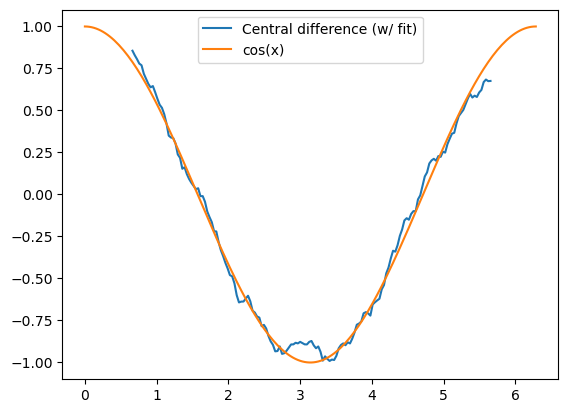

In [10]:
from scipy.optimize import curve_fit
import math

windowSize = 41   #number of points to consider within the vicinity of x - should be odd
halfWindow = int((windowSize-1)/2)

def f(x, a, b, c):
    return a*x*x + b*x + c
def fp(x, a, b):
    return 2*a*x + b

derivative = np.empty(xValues.size, float)
for i in range(halfWindow+1, n-halfWindow):   #can't calculate the central difference for extreme saple points
    popt, pcov = curve_fit(f, xValues[i-halfWindow:i+halfWindow+1], yValues[i-halfWindow:i+halfWindow+1], p0=[1,1,1])   #slice away sample points outside the vicinity of index i and perform the fit
    a = popt[0]
    b = popt[1]
    derivative[i] = fp(xValues[i], a, b)   #calculate the derivative of the fit function with parameters a and b

plt.figure()
plt.plot(xValues[halfWindow+1:-halfWindow], derivative[halfWindow+1:-halfWindow], label="Central difference (w/ fit)")   #slice away extreme x values for which we can't calculate the derivative
plt.plot(xValues, cosine, label="cos(x)")
plt.legend()

The numerical derivative now agrees with the true derivative fairly well.

## Interpolation

Interpolation is the process of calculating new data points, between existing data points.  The process of interpolation is somewhat similar to calculating numerical derivatives.

Let's assume we know the value of some function $f(x)$ at just two points, $x=a$ and $x=b$.  In the context of linear interpolation, we assume the function is linear between these points.  In this case, we can calculate the derivative of the linear function in this region using the forward difference equation, and use this value to estimate the value of the function for any intermediate value of $x$.

\begin{equation}\tag{3}
    f(x)\approx f(a) + m_{\mathrm{forward~diff}}\left(x-a\right)
\end{equation}

As an example, let's assume we have 11 data points corresponding to the function $f(x)=\cos(-x^2/9)$ between $x=0$ and $x=10$.  This will give us sample points only for integer values of $x$.

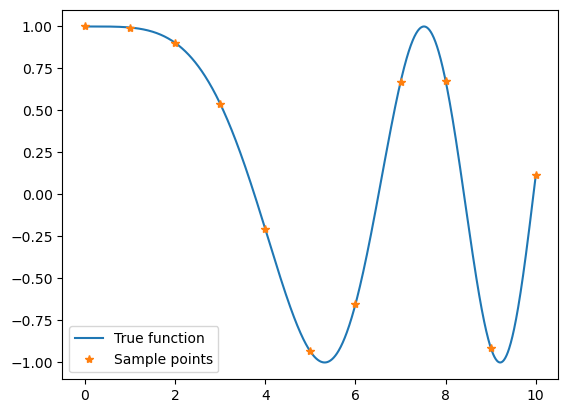

In [11]:
n = 11
x0 = 0
xn = 10

xValues = np.linspace(x0, xn, n)
yValues = np.cos(-xValues**2/9.0)

h = (xn - x0)/(n-1)   #grid spacing

#calculate a denser grid of true values (for plotting purposes)
denseXValues = np.linspace(x0, xn, 100*n + 1)   
denseYValues = np.cos(-denseXValues**2/9.0)

plt.figure()
plt.plot(denseXValues, denseYValues, label="True function")
plt.plot(xValues, yValues, "*", label="Sample points")
plt.legend()

However, we can interpolate between these points to estimate the function at intermediate values, such as $x=4.5$.  To do so, we should first find the pair of data points that span $x=4.5$.  Again, let's use the `where()` function.

In [12]:
x = 4.5

np.where(xValues<x)

(array([0, 1, 2, 3, 4]),)

From this `array`, we want the last index (and the following index).

In [13]:
ia = np.where(xValues<x)[0][-1]   #get index corresponding to last sample point with x<a
ib = ia+1

ia, ib

(4, 5)

Now we can calculate the forward diff and apply Equation 3 within this interval.

Error: 0.05814719538313606


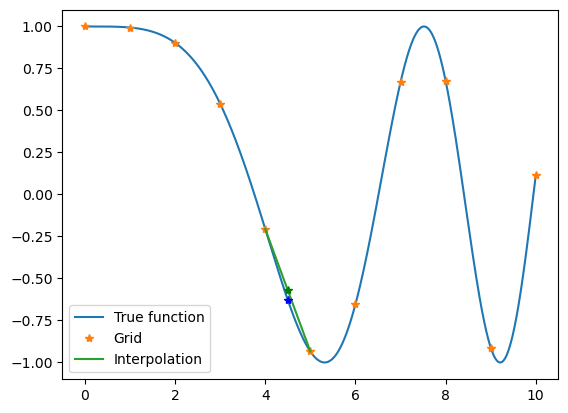

In [14]:
############################################################
#from above
plt.figure()
plt.plot(denseXValues, denseYValues, label="True function")
plt.plot(xValues, yValues, "*", label="Grid")
############################################################

forwardDiff = (yValues[1:] - yValues[:-1]) / h

ROIXValues = np.linspace(xValues[ia], xValues[ib], 101)   #create dense grid between a and b
prediction = yValues[ia] + forwardDiff[ia]*(ROIXValues-xValues[ia])   #estimate intermediate points using Equation 3

plt.plot(ROIXValues, prediction, label="Interpolation")

#add stars for prediction and actual value at x=4.5
j = np.where(np.isclose(x, ROIXValues))[0][-1]   #get index of our prediction corresponding to x=4.5
k = np.where(np.isclose(x, denseXValues))[0][-1] #get index of our true value corresponding to x=4.5

plt.plot([ROIXValues[j]], [prediction[j]], "g*")
plt.plot([denseXValues[k]], [denseYValues[k]], "b*")
plt.legend()

print("Error:", prediction[j] - denseYValues[k])

In this particular interval, the linear approximation is pretty accurate.  However, this is not true in all regions.

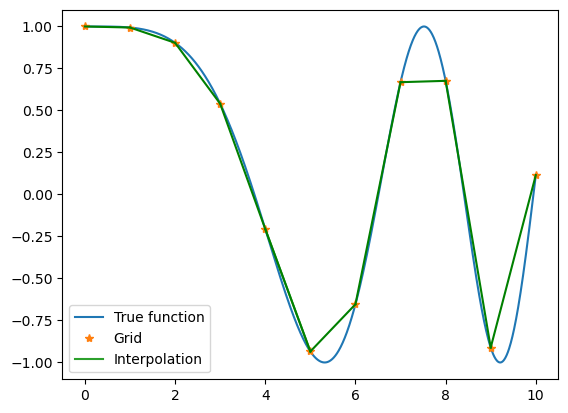

In [15]:
############################################################
#from above
plt.figure()
plt.plot(denseXValues, denseYValues, label="True function")
plt.plot(xValues, yValues, "*", label="Grid")
plt.plot(ROIXValues, prediction, label="Interpolation")
plt.legend()
############################################################
    
for i in range(n-1):   #i labels the slice

    #same as above with ia->i and ib->i+1
    ROIXValues = np.linspace(xValues[i], xValues[i+1], 101)   #create dense grid
    prediction = yValues[i] + forwardDiff[i]*(ROIXValues-xValues[i])   #estimate intermediate points using Equation 3

    plt.plot(ROIXValues, prediction, "g")

As we have seen previously, we can once again improve our approximation by using higher-order polynomials to perform the interpolation.  This is a bit more complicated.  Fortunately, scipy provides a `interp1d()` function to perform interpolation with a variety of polynomials: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

The `interp1d()` function takes an `array` of $x$ and $y$ values, as well as the desired polynomial order (linear, quadratic, cubic).  It returns a new function, which takes an `array` of $x$ values and returns an `array` of corresponding $y$ values.

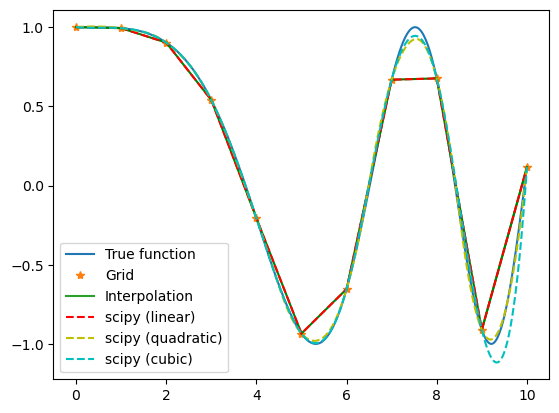

In [16]:
############################################################
#from above
plt.figure()
plt.plot(denseXValues, denseYValues, label="True function")
plt.plot(xValues, yValues, "*", label="Grid")
plt.plot(ROIXValues, prediction, label="Interpolation")
    
for i in range(n-1):

    #same as above with ia->i and ib->i+1
    ROIXValues = np.linspace(xValues[i], xValues[i+1], 101)   #create dense grid
    prediction = yValues[i] + forwardDiff[i]*(ROIXValues-xValues[i])   #estimate intermediate points using Equation 3

    plt.plot(ROIXValues, prediction, "g")
############################################################

from scipy.interpolate import interp1d

linear = interp1d(xValues, yValues, kind ='linear')
plt.plot(denseXValues, linear(denseXValues), "r--", label="scipy (linear)")

quadratic = interp1d(xValues, yValues, kind ='quadratic')
plt.plot(denseXValues, quadratic(denseXValues), "y--", label="scipy (quadratic)")

cubic = interp1d(xValues, yValues, kind ='cubic')
plt.plot(denseXValues, cubic(denseXValues), "c--", label="scipy (cubic)")

plt.legend()

As you can see, higher-order polynomials do not always perform better than lower-order polynomials.